In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score


In [2]:
data = pd.read_csv('The Lannister Data Chronicles_ Decrypting Diabetes.csv')


In [3]:
print(data.head())

   Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0       1         1          1   40       1       0   
1             0       0         0          0   25       1       0   
2             0       1         1          1   28       0       0   
3             0       1         0          1   27       0       0   
4             0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18        15         1    0    9          4   
1            1

In [4]:
print(data.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [5]:
print(data.describe())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [6]:
num_cols = data.select_dtypes(include=[np.number]).columns
print(num_cols)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [7]:
data[num_cols] = data[num_cols].fillna(data[num_cols].median())
print(data[num_cols])

        Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                  0       1         1          1   40       1       0   
1                  0       0         0          0   25       1       0   
2                  0       1         1          1   28       0       0   
3                  0       1         0          1   27       0       0   
4                  0       1         1          1   24       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253675             0       1         1          1   45       0       0   
253676             2       1         1          1   18       0       0   
253677             0       0         0          1   28       0       0   
253678             0       1         0          1   23       0       0   
253679             2       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                          0         

In [8]:
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
               'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

data[binary_cols] = data[binary_cols].astype(int)
print(data[binary_cols])

        HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0            1         1          1       1       0                     0   
1            0         0          0       1       0                     0   
2            1         1          1       0       0                     0   
3            1         0          1       0       0                     0   
4            1         1          1       0       0                     0   
...        ...       ...        ...     ...     ...                   ...   
253675       1         1          1       0       0                     0   
253676       1         1          1       0       0                     0   
253677       0         0          1       0       0                     0   
253678       1         0          1       0       0                     0   
253679       1         1          1       0       0                     1   

        PhysActivity  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  DiffWa

<Figure size 2000x1500 with 0 Axes>

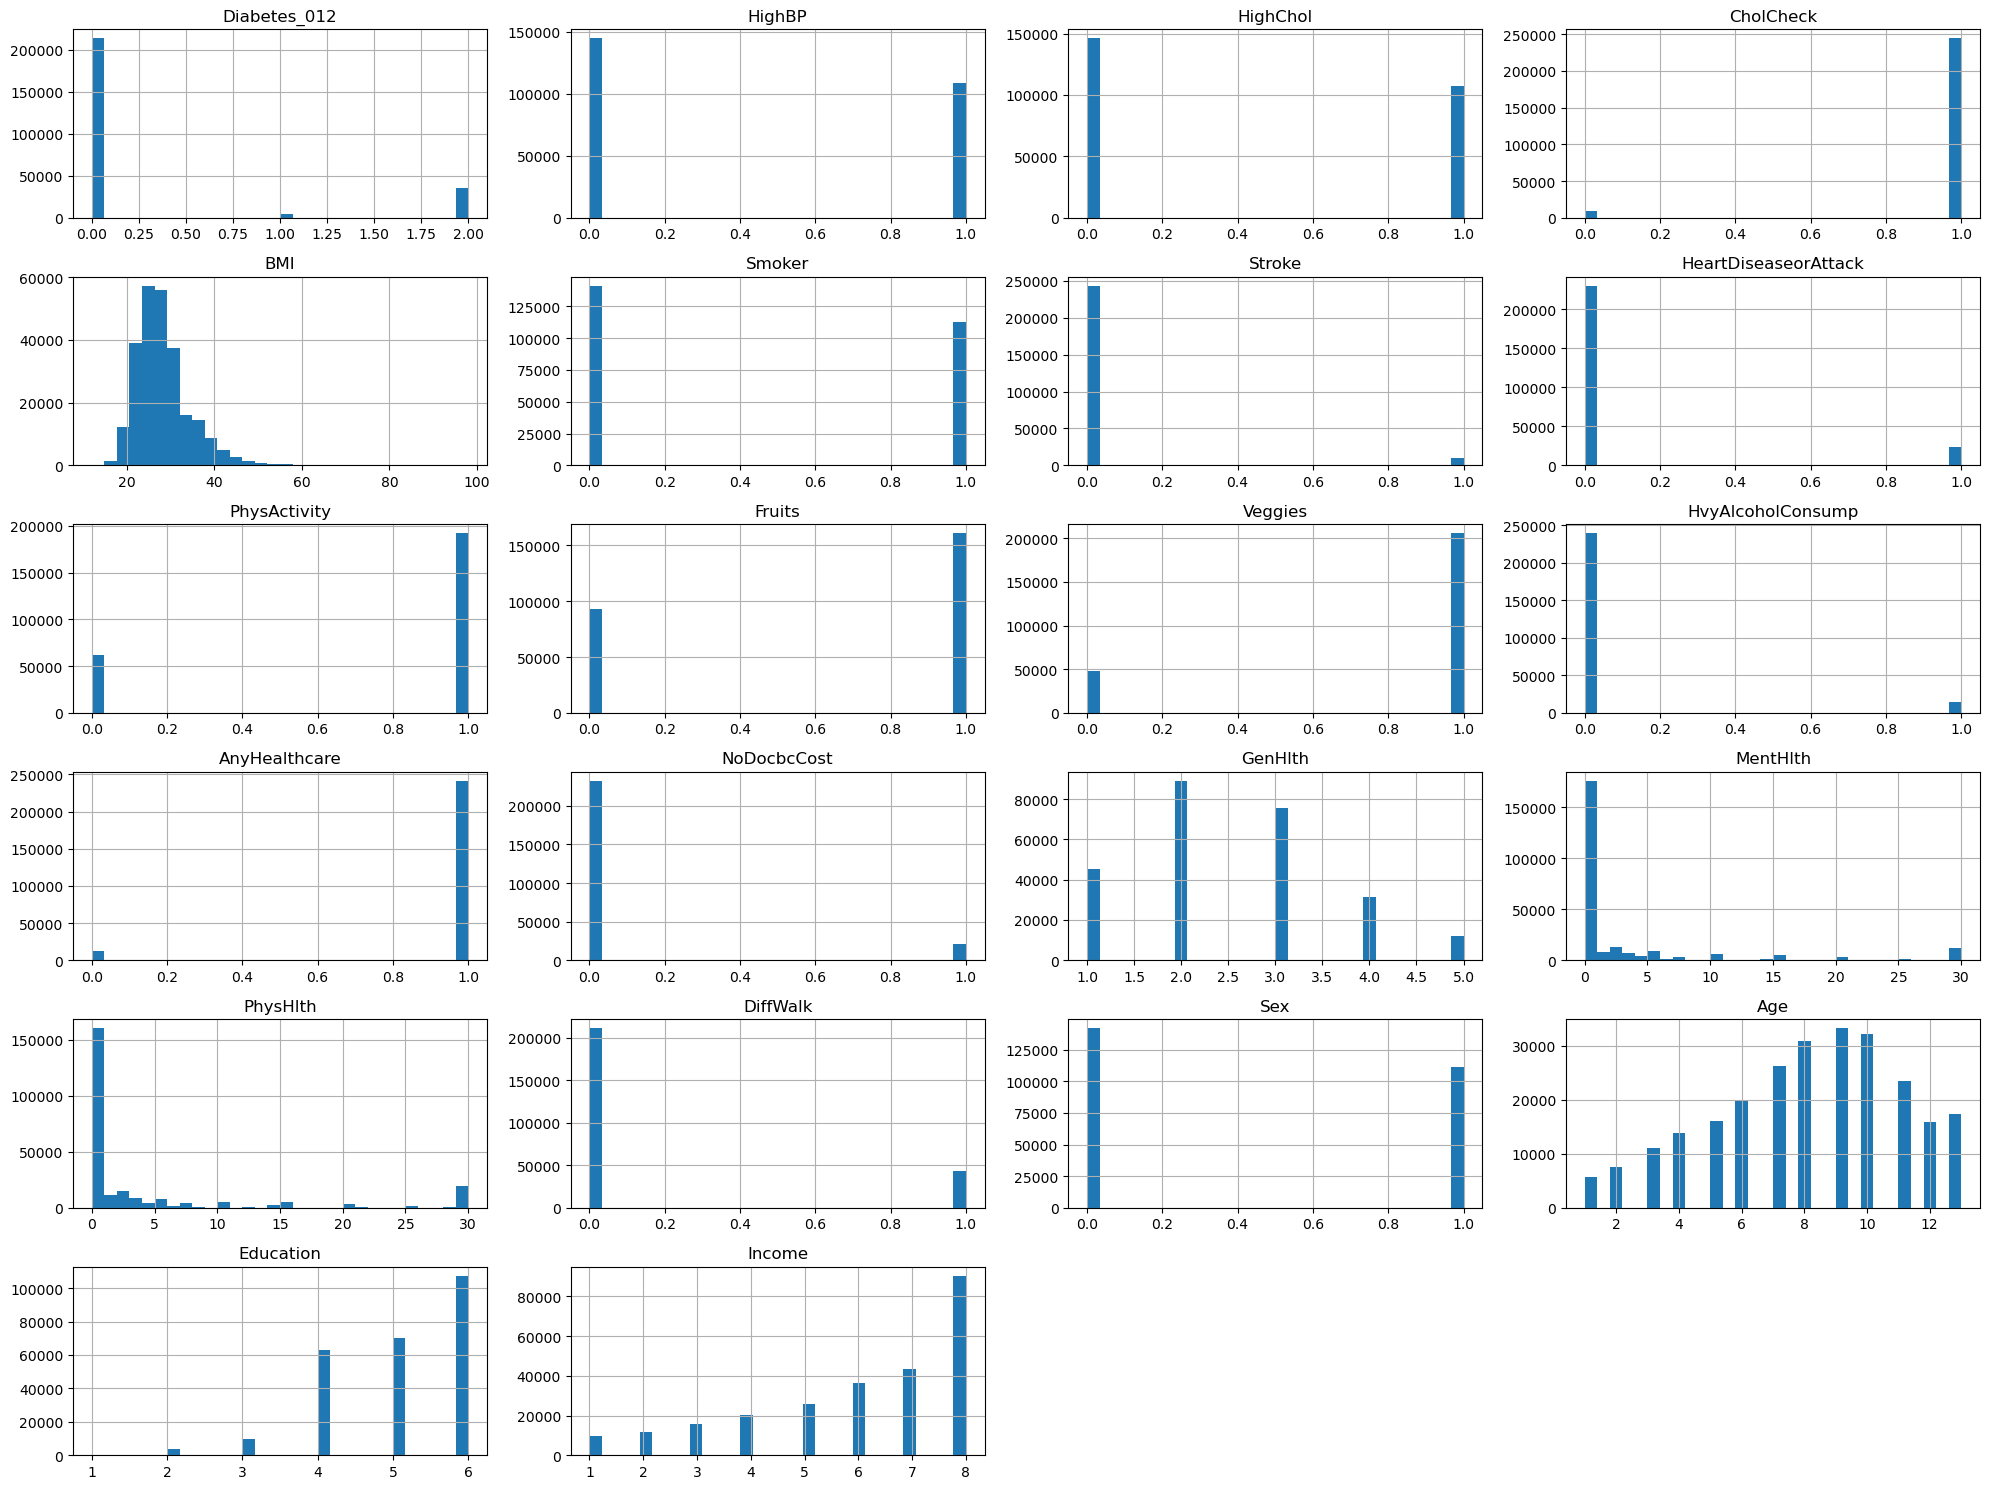

In [9]:
plt.figure(figsize=(20, 15))
data.hist(bins=30, figsize=(20, 15), layout=(6, 4))  # Adjusted layout to (6, 4)
plt.tight_layout()
plt.show()



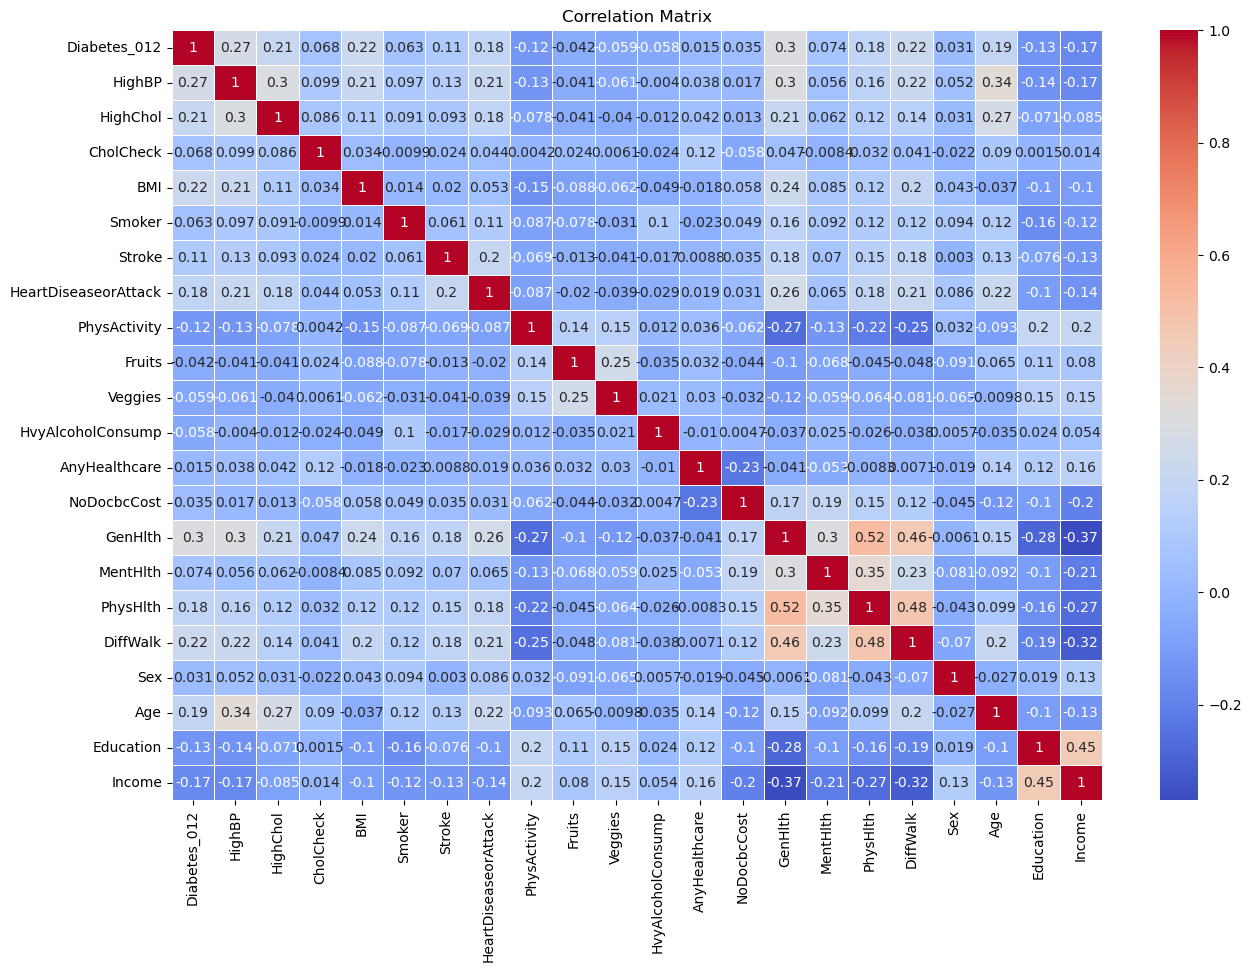

In [10]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [11]:
data['BMICategory'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

data['HealthScore'] = data[['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'GenHlth', 'MentHlth', 'PhysHlth']].sum(axis=1)

data['LifestyleScore'] = data[['Smoker', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare']].sum(axis=1)

data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 18, 35, 50, 65, np.inf], labels=['0-18', '19-35', '36-50', '51-65', '65+'])



In [12]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMICategory,HealthScore,LifestyleScore,AgeGroup
0,0,1,1,1,40,1,0,0,0,0,...,15,1,0,9,4,3,Obese,40,2,0-18
1,0,0,0,0,25,1,0,0,1,0,...,0,0,0,7,6,1,Overweight,3,2,0-18
2,0,1,1,1,28,0,0,0,0,1,...,30,1,0,9,4,8,Overweight,67,1,0-18
3,0,1,0,1,27,0,0,0,1,1,...,0,0,0,11,3,6,Overweight,3,2,0-18
4,0,1,1,1,24,0,0,0,1,1,...,0,0,0,11,5,4,Normal,7,2,0-18


In [13]:
data = pd.get_dummies(data, columns=['BMICategory', 'AgeGroup', 'Education', 'Income'], drop_first=True)

In [14]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,0,1,1,1,40,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,25,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,1,1,28,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,1,0,1,27,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,1,24,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [16]:
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [19]:
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     64180
           1       0.00      0.00      0.00      1425
           2       0.47      0.20      0.28     10499

    accuracy                           0.84     76104
   macro avg       0.44      0.39      0.40     76104
weighted avg       0.79      0.84      0.81     76104



In [20]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Confusion Matrix:
[[61910    43  2227]
 [ 1288     0   137]
 [ 8423    18  2058]]


In [21]:
from sklearn.metrics import accuracy_score
accuracyR = accuracy_score(y_test,rf_predictions)
print("Random Forest Accuracy:", (accuracyR*100))

Random Forest Accuracy: 84.05340060969199


In [22]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)


In [23]:
print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, gb_predictions))

Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     64180
           1       0.00      0.00      0.00      1425
           2       0.55      0.20      0.29     10499

    accuracy                           0.85     76104
   macro avg       0.47      0.39      0.40     76104
weighted avg       0.81      0.85      0.81     76104



C:\Users\sushm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sushm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sushm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_predictions))

Confusion Matrix:
[[62627     0  1553]
 [ 1278     0   147]
 [ 8448     0  2051]]


In [25]:
from sklearn.metrics import accuracy_score
accuracyG = accuracy_score(y_test,gb_predictions)
print("Gradient Boosting Accuracy:", (accuracyG*100))

Gradient Boosting Accuracy: 84.98633448964574


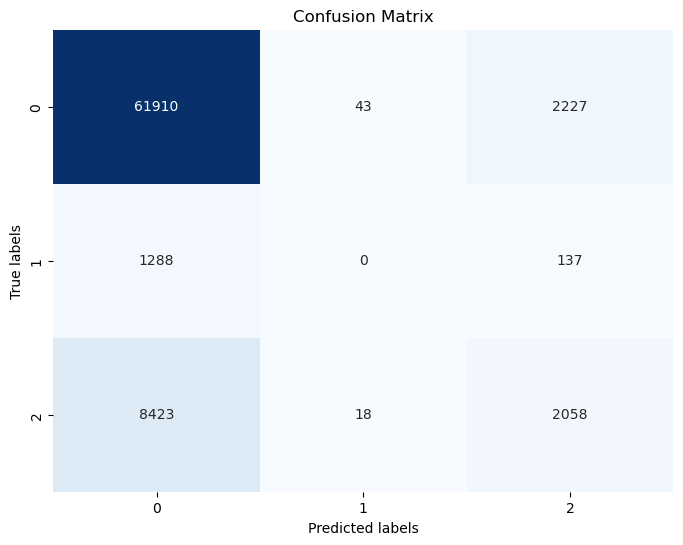

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

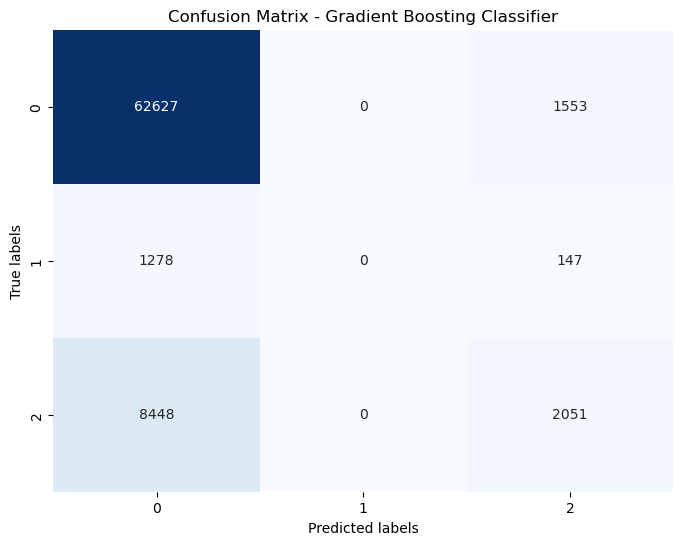

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, gb_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()

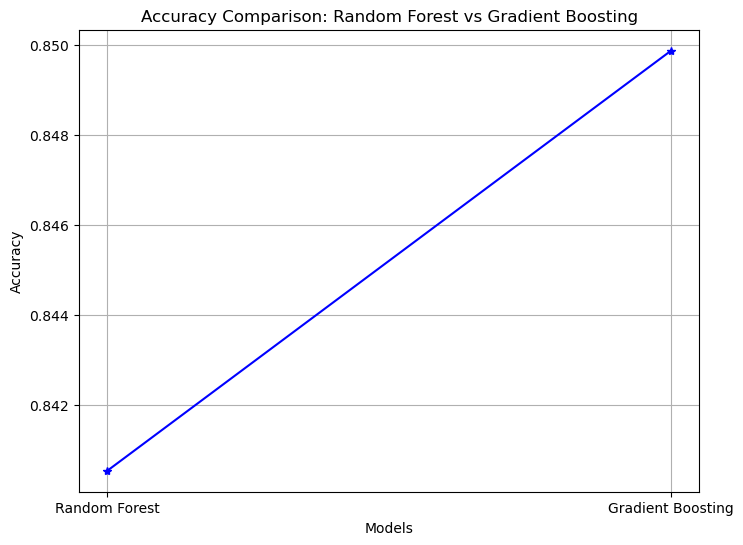

In [35]:
accuracy_rf = accuracy_score(y_test, rf_predictions)
accuracy_gb = accuracy_score(y_test, gb_predictions)

models = ['Random Forest', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_gb]

plt.figure(figsize=(8, 6))
plt.plot(models, accuracies, marker='*', linestyle='-', color='b')
plt.title('Accuracy Comparison: Random Forest vs Gradient Boosting')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()